Устанавливаем необходимые для работы зависимости

In [1]:
!pip install pykeen networkx matplotlib seaborn

Далее, импортируем необходимых модулей

In [2]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

Здесь мы устанавливаем необходимые библиотеки и импортируем модули, которые будут использоваться в лабораторной работе.

## Взаимодействие с графовым датасетом и описание данных

В данной работе мы будем использовать графовый датасет [DBpedia50](https://arxiv.org/abs/1711.03438), предоставляющий собой выборку менее 50 тысяч сущностей из графа dbpedia.


In [3]:
from pykeen.datasets import FB15k

In [4]:
# Загрузка графового датасета DBpedia50
dbpedia_dataset = FB15k()

In [5]:
# Просмотр описания датасета
print(dbpedia_dataset)

FB15k(training_path="/home/maxim/.data/pykeen/datasets/fb15k/FB15k/freebase_mtr100_mte100-train.txt", testing_path="/home/maxim/.data/pykeen/datasets/fb15k/FB15k/freebase_mtr100_mte100-test.txt", validation_path="/home/maxim/.data/pykeen/datasets/fb15k/FB15k/freebase_mtr100_mte100-valid.txt")


# Обучение модели ComplEx на 100 эпохах


Использеум pipeline() предоставляемый пакетом pykeen для обучения модели, в качестве аргументов указываем тип модели, набор данных, количество эпох обучения и устройство на котором проводится обучений

Проверяем наличие GPU устройства и вызываем функцию pipeline(), которая запускает процесс обучения модели, тестирования и валидации.

In [6]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Запускаем пайплайн обучения модели, в этот раз использем модель [ComplEx](https://pykeen.readthedocs.io/en/stable/api/pykeen.models.ComplEx.html)

In [7]:
# Задаем параметры для pipeline
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

No random seed is specified. Setting to 22350757.


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 42.02s seconds



В PyKEEN, функция plot_losses используется для визуализации изменения значений функции потерь во времени (по эпохам) в процессе обучения модели. Эта функция часто используется для мониторинга производительности модели во время тренировки и может быть полезной для оценки, насколько хорошо модель учится на обучающем наборе данных.


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

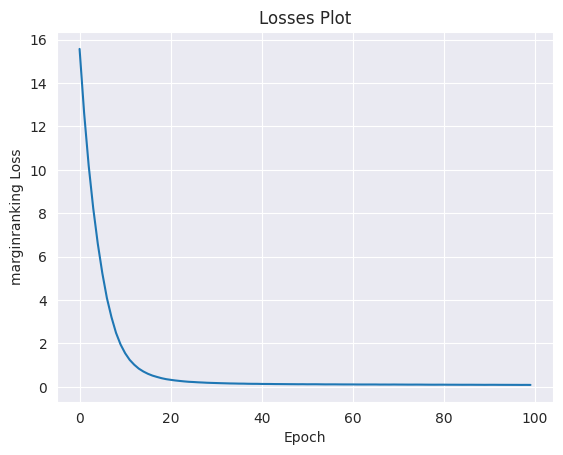

In [8]:
# Обученная модель хранится в pipeline_results
model = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

## Метрики оценки работы модели

В PyKEEN пакет metrics предоставляет реализацию различных метрик, которые могут быть использованы для оценки качества работы моделей знаний (knowledge graph embedding models). Эти метрики позволяют оценивать, насколько хорошо модель справляется с предсказанием троек в графе знаний.

Некоторые из основных метрик, доступных в пакете metrics:

*   Rank-based Metrics - которые измеряют позицию верного ответа (положительной тройки) в отсортированном списке всех возможных троек
*   Top-K Metrics - которые оценивают качество предсказаний в топ-K результатах.
*   Clustering Metrics - которые измеряют качество кластеризации.

Рассчитаем некоторые из них далее.

In [9]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

# Оценить работу модели
metrics = evaluator.evaluate(pipeline_results.model, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 46.89s seconds


Hits@1: 0.07804167865788628
Hits@3: 0.15405190364138072
Hits@5: 0.2013932386450204
Hits@10: 0.2787069797362496
Mean Reciprocal Rank: 0.1446741372346878


## Получение представлений узлов

После того как модель обучена, мы можем полчить представления узлов и отношений из результатов работы пайплайна.

In [10]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

Мы извлекаем представления узлов из обученной модели. В этом контексте, представления узлов - это векторы, представляющие сущности в графе.


Далее извлечем лейблы для сущнойстей и визуализируем некоторые из сущностей на плоскости.

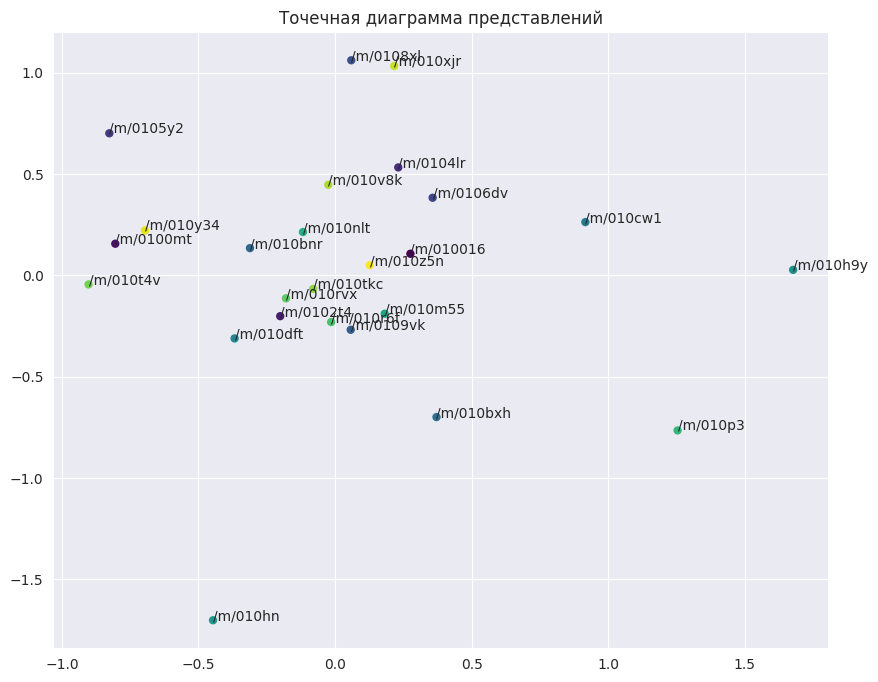

In [11]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

Мы используем NetworkX и Matplotlib для визуализации представлений узлов на графе. Каждая сущность представлена точкой в двумерном пространстве, и близкие точки соответствуют похожим узлам в графе.


## Измерение Node Similarity

Добавим код для измерения близости узлов на основе представлений. Расчитаем близость между несколькими случайными узлами. Используем для этого косинусную схожесть, манхэттенское и евклидово расстояние. Визуализируем полученные результаты как матрицу близости.


[[ 0.       15.637672 17.244972 17.251188]
 [15.637672  0.       23.799467 22.217339]
 [17.244972 23.799467  0.       23.803463]
 [17.251188 22.217339 23.803463  0.      ]]


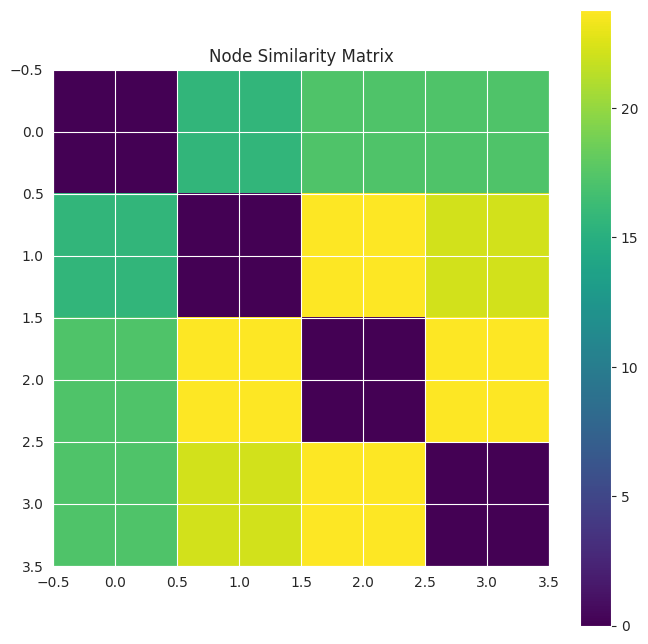

[[ 0.9999999  -0.00345517  0.05951827 -0.0497946 ]
 [-0.00345517  1.         -0.04673169  0.08080155]
 [ 0.05951827 -0.04673169  0.99999994  0.04343323]
 [-0.0497946   0.08080155  0.04343323  0.99999976]]


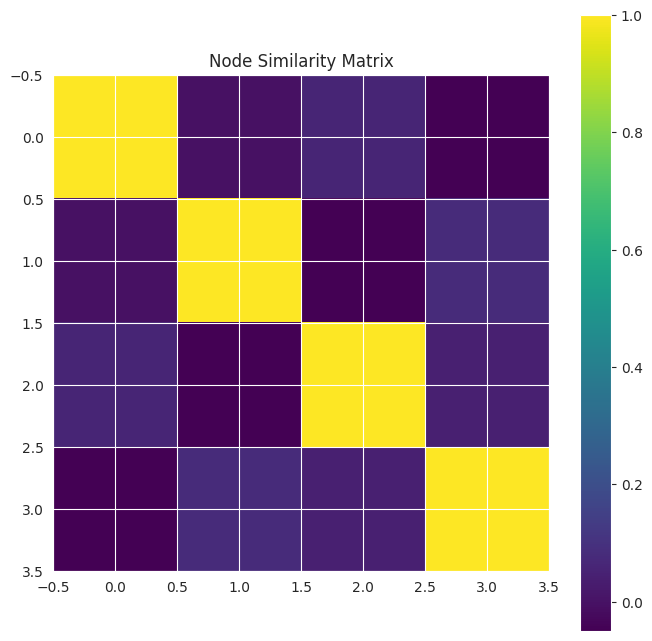

[[  0.         252.72880812 268.20991448 275.63711954]
 [252.72880812   0.         385.50847205 342.97671352]
 [268.20991448 385.50847205   0.         385.90780397]
 [275.63711954 342.97671352 385.90780397   0.        ]]


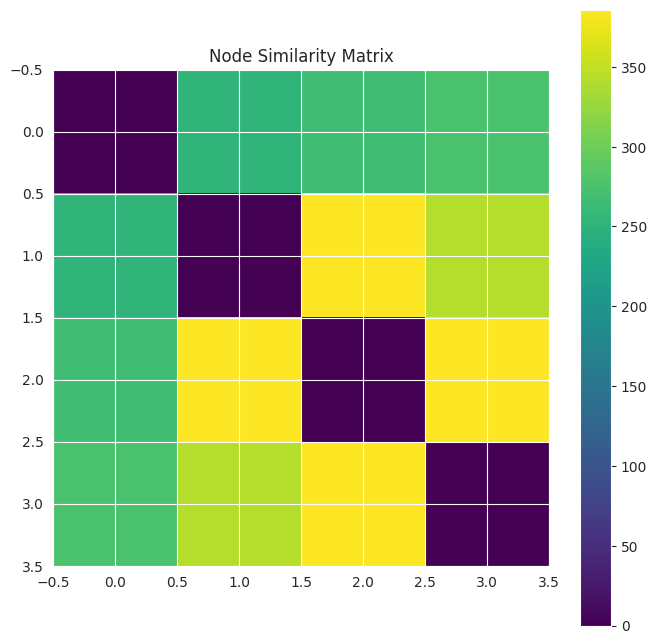

In [13]:
def diplay_matrix(similarity_matrix):
  # Визуализация матрицы близости
  plt.figure(figsize=(8, 8))
  plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
  plt.colorbar()
  plt.title('Node Similarity Matrix')
  plt.show()


# Рассчет близости между узлами
methods = [euclidean_distances,cosine_similarity,manhattan_distances]
#Узлы
nodes = [embedding_numpy[1324],embedding_numpy[12240],embedding_numpy[4543],embedding_numpy[7242]]
for method in methods:
  similarity_matrix = method(nodes)
  print(similarity_matrix)
  diplay_matrix(similarity_matrix)

Этот код использует euclidean_distances,cosine_similarity и manhattan_distances из scikit-learn для вычисления матрицы близости между узлами на основе их представлений. Затем мы визуализируем эту матрицу для наглядного представления Node Similarity.

## Поиск соседей узла
Одной из задач где используется схожесть узлов является задача поиска ближайших соседей конкретного узла в графе.
Рассмотрии применение NearestNeighbors на созданных представлениях с использованием только что рассмотренных методов рассчета близости.

In [14]:
# Выбираем случайный узел
random_node_index = 517
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[2.3841858e-07 1.5493086e+01 1.5527471e+01 1.5543561e+01]]
Индексы:[[  517  7456 13346  2240]]
Ближайшие соседи узла /m/015mrk: ['/m/015mrk', '/m/049vhf', '/m/0j__m', '/m/01nvdc'] 

Метрика:cosine
Дистанции:[[0.        0.7186457 0.7307321 0.747646 ]]
Индексы:[[  517  1733  9474 11334]]
Ближайшие соседи узла /m/015mrk: ['/m/015mrk', '/m/01hgwkr', '/m/06rgq', '/m/0bqsy'] 

Метрика:manhattan
Дистанции:[[  0.         245.84286499 245.93019104 246.18638611]]
Индексы:[[  517 14437  2991 13048]]
Ближайшие соседи узла /m/015mrk: ['/m/015mrk', '/m/0ps1q', '/m/01wx7k', '/m/0gyr_7'] 


In [15]:
# Выбираем второй случайный узел
random_node_index = 2738
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[2.3841858e-07 1.2415047e+01 1.2450486e+01 1.2459221e+01]]
Индексы:[[ 2738 11100  6172  9827]]
Ближайшие соседи узла /m/01vcnl: ['/m/01vcnl', '/m/0b256b', '/m/03cwqpm', '/m/07b8m1'] 

Метрика:cosine
Дистанции:[[0.         0.7401142  0.74925923 0.7655916 ]]
Индексы:[[ 2738  6172 11100  9827]]
Ближайшие соседи узла /m/01vcnl: ['/m/01vcnl', '/m/03cwqpm', '/m/0b256b', '/m/07b8m1'] 

Метрика:manhattan
Дистанции:[[  0.         188.98616028 189.43945312 190.06274414]]
Индексы:[[2738 6966 9827 9316]]
Ближайшие соседи узла /m/01vcnl: ['/m/01vcnl', '/m/03yhgp', '/m/07b8m1', '/m/06jwys'] 


## Эксперименты

Для экспериментов была выбрана модель HolE, 

Сравните эффективность модели выше и HolE в предсказании отношений и измерении Node Similarity.

# Модель ComplEx на 20 эпохах обучений

In [16]:
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=20),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 44.67s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

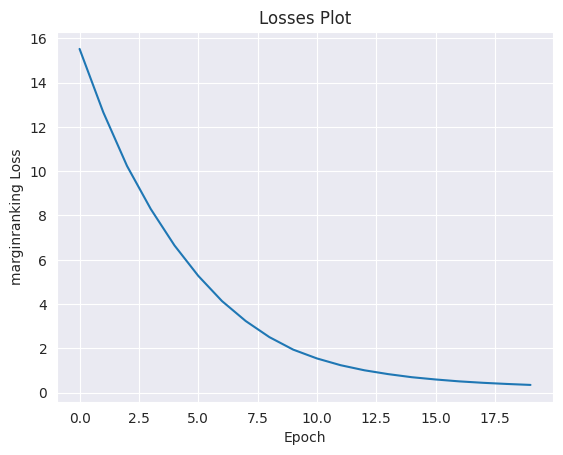

In [17]:
pipeline_results.plot_losses()

In [18]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()
model_v2 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v2, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 43.63s seconds


Hits@1: 0.006712261515803016
Hits@3: 0.01599769768583569
Hits@5: 0.02213438066056102
Hits@10: 0.03467860709993059
Mean Reciprocal Rank: 0.018129849806427956


In [19]:
node_embeddings = model_v2.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

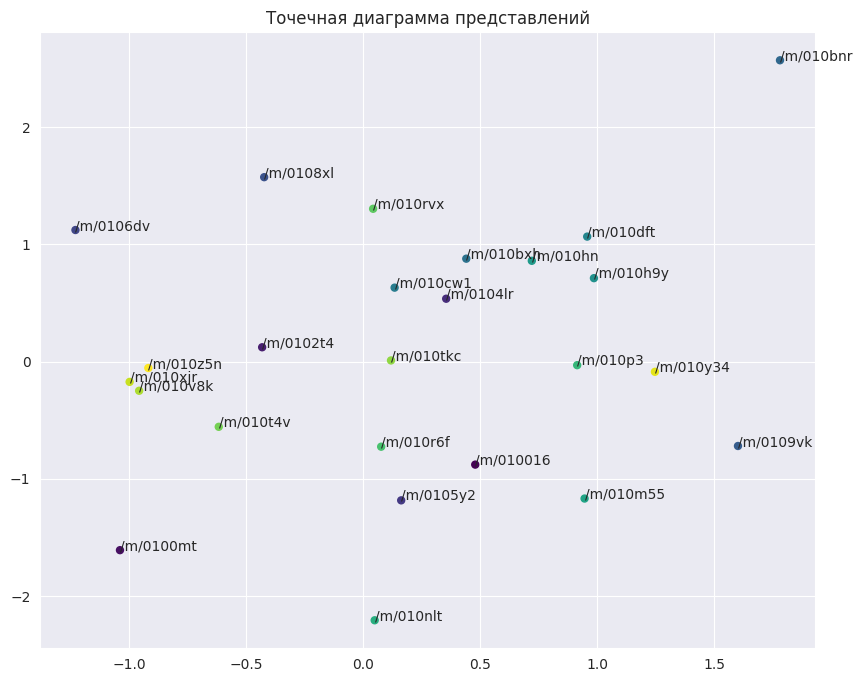

In [20]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [21]:
# Выбираем случайный узел
random_node_index = 678
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       22.127115 22.610144 23.305634]]
Индексы:[[  678 10505 10504 12764]]
Ближайшие соседи узла /m/016k6x: ['/m/016k6x', '/m/08mbj5d', '/m/08mbj32', '/m/0g8g6'] 

Метрика:cosine
Дистанции:[[2.3841858e-07 7.9606235e-01 7.9832649e-01 8.0675799e-01]]
Индексы:[[  678 12279 12764  5828]]
Ближайшие соседи узла /m/016k6x: ['/m/016k6x', '/m/0f1jhc', '/m/0g8g6', '/m/034ls'] 

Метрика:manhattan
Дистанции:[[  0.         354.72567749 369.59909058 372.68280029]]
Индексы:[[  678 10505 10504  9479]]
Ближайшие соседи узла /m/016k6x: ['/m/016k6x', '/m/08mbj5d', '/m/08mbj32', '/m/06rkl'] 


In [22]:
# Выбираем второй случайный узел
random_node_index = 43
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       22.346127 23.820166 23.983608]]
Индексы:[[   43 10505 10504  5336]]
Ближайшие соседи узла /m/011s0: ['/m/011s0', '/m/08mbj5d', '/m/08mbj32', '/m/02vxfw_'] 

Метрика:cosine
Дистанции:[[5.9604645e-08 7.9115367e-01 8.1217963e-01 8.1505072e-01]]
Индексы:[[   43  8196 14780  3793]]
Ближайшие соседи узла /m/011s0: ['/m/011s0', '/m/053j4w4', '/m/0x25q', '/m/026vcc'] 
Метрика:manhattan
Дистанции:[[  0.         359.17050171 376.4821167  376.71179199]]
Индексы:[[   43 10505  5336  6387]]
Ближайшие соседи узла /m/011s0: ['/m/011s0', '/m/08mbj5d', '/m/02vxfw_', '/m/03hjv97'] 


# Модель HolE, число эпох 100

In [23]:
pipeline_results = pipeline(
    model="HolE",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1888 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 84.89s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

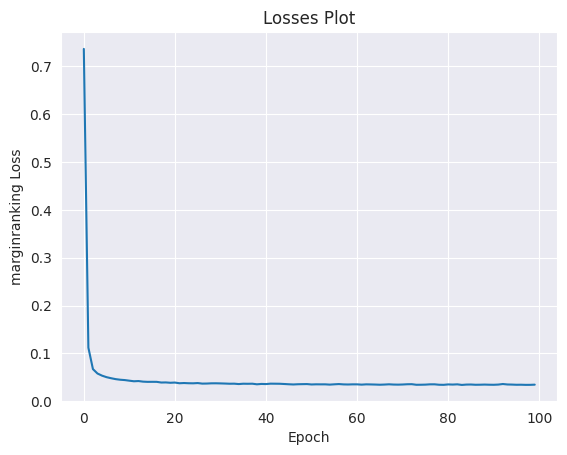

In [24]:
pipeline_results.plot_losses()

In [25]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

model_v3 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v3, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/59.1k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 85.77s seconds


Hits@1: 0.14425860405275007
Hits@3: 0.2551929034551641
Hits@5: 0.3157217585617308
Hits@10: 0.40750114269269183
Mean Reciprocal Rank: 0.2322118729352951


In [26]:
node_embeddings = model_v3.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

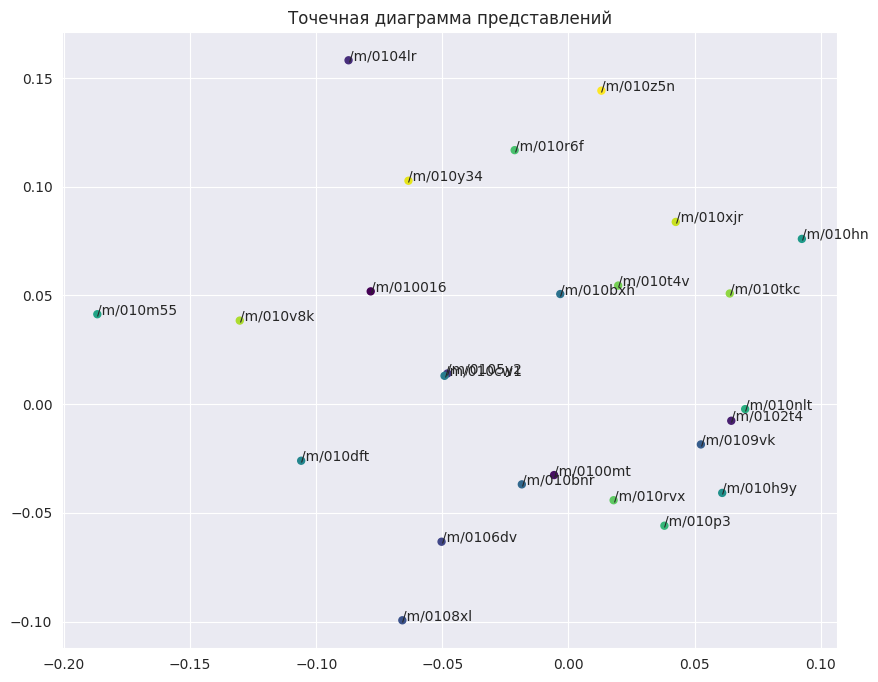

In [27]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [28]:
# Выбираем случайный узел
random_node_index = 345
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[1.4901161e-08 9.8100823e-01 9.8310715e-01 9.8411834e-01]]
Индексы:[[ 345 2831 4097  309]]
Ближайшие соседи узла /m/0147dk: ['/m/0147dk', '/m/01vw20h', '/m/02_fj', '/m/013w7j'] 

Метрика:cosine
Дистанции:[[0.         0.48118854 0.48324984 0.48424447]]
Индексы:[[ 345 2831 4097  309]]
Ближайшие соседи узла /m/0147dk: ['/m/0147dk', '/m/01vw20h', '/m/02_fj', '/m/013w7j'] 

Метрика:manhattan
Дистанции:[[ 0.         10.68804073 11.03137779 11.0669117 ]]
Индексы:[[ 345 4097  309 1382]]
Ближайшие соседи узла /m/0147dk: ['/m/0147dk', '/m/02_fj', '/m/013w7j', '/m/01d1st'] 


In [29]:
# Выбираем второй случайный узел
random_node_index = 631
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.0594245 1.0673707 1.0715344]]
Индексы:[[ 631 9092 7744 4494]]
Ближайшие соседи узла /m/0168ql: ['/m/0168ql', '/m/066l3y', '/m/04l19_', '/m/02h8hr'] 

Метрика:cosine
Дистанции:[[0.         0.5678296  0.5785427  0.60392153]]
Индексы:[[ 631 9092 4494 7744]]
Ближайшие соседи узла /m/0168ql: ['/m/0168ql', '/m/066l3y', '/m/02h8hr', '/m/04l19_'] 

Метрика:manhattan
Дистанции:[[ 0.         11.83116627 12.02114487 12.16853142]]
Индексы:[[ 631 9092 4494 7744]]
Ближайшие соседи узла /m/0168ql: ['/m/0168ql', '/m/066l3y', '/m/02h8hr', '/m/04l19_'] 
